<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Caso de estudio de minería de datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Minería de datos</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Jordi Gironés Roig <span style="margin-left: 30px;">Coordinación: Julià Minguillón Alfonso</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Índice de contenidos

1. [Introducción](#Introducción)

2. [Librerías Python necesarias](#Librerías-Python-necesarias)

3. [Presentación de New Diagnosis LLC](#Presentación-de-New-Diagnosis-LLC)

4. [Paso 1: Establecer un objetivo analítico](#Paso-1:-Establecer-un-objetivo-analítico)

5. [Paso 2: Verificar los datos](#Paso-2:-Verificar-los-datos)

6. [Paso 3: Acondicionado de datos](#Paso-3:-Acondicionado-de-datos)

7. [Paso 4: Análisis exploratorio](#Paso-4:-Análisis-exploratorio)

8. [Paso 5: Clasificación](#Paso-5:-Clasificación)

9. [Paso 6: Reproducibilidad](#Paso-6:-Reproducibilidad)

10. [Conclusiones](#Conclusiones)

11. [Agradecimientos](#Agradecimientos)

## Introducción

[[ inicio del documento ]](#Indice-de-contenidos)

Presentaremos en este documento un **flujo analítico completo y contextualizado** en el ámbito de un caso de estudio, puesto que entendemos que la analítica de datos debe enfocarse de un modo holístico donde el dato y lo que este describe forman un núcleo inseparable.  

A lo largo de la asignatura de **minería de datos** se han estudiado distintas técnicas con el objetivo de cubrir cada una de las fases que comprenden un proceso de extracción de conocimiento a partir de un juego de datos en bruto. En este *notebook* Jupyter usaremos el lenguaje Python para mostrar un flujo analítico completo de principio a fin.

Más allá de presentar un ejemplo analítico fácilmente reproducible donde se dispone de código y datos, hemos querido mantener el foco en transmitir un estilo de **buenas prácticas** para que el estudiante pueda crecer como *data scientist* siendo más efectivo y, sobre todo, **más colaborativo**.


## Librerías Python necesarias

[[ go back to the top ]](#Indice-de-contenidos)

En caso de no tener instalado Python, proponemos utilizar la distribución de Anaconda, que, a su vez, nos permitirá trabajar con Jupyter. En el siguiente enlace [Anaconda Python distribution](https://www.anaconda.com/download) encontraremos todo lo necesario para proceder con la instalación. 

Este *notebook* usa varios paquetes Python que vienen preinstalados con la distribución Anaconda de Python. Esta es la lista de los más relevantes:

* **NumPy**: contiene una colección de funciones que facilitan el cálculo numérico con matrices.
* **pandas**: permite trabajar con estructuras de datos tipo *DataFrame*.
* **scikit-learn**: se trata de una colección de funciones habituales en el mundo de la inteligencia artificial.
* **matplotlib**: es una librería especializada en la generación de gráficos.
* **Seaborn**: contiene funciones avanzadas para la generación de gráficos estadísticos.

Para facilitar el proceso de instalación, proveemos también de los comandos necesarios para ser usados en `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
`conda` se encargará de preguntar si quiere instalarse una versión más reciente del paquete en caso de que este ya esté instalado.


## Presentación de New Diagnosis LLC

[[ inicio del documento ]](#Indice-de-contenidos)

Aprovechando nuestro conocimiento en los ámbitos de la minería de datos y los análisis clínicos, hemos fundado una *start-up* dedicada a facilitar herramientas de diagnóstico a hospitales.

Nuestra propuesta es firmar contratos de colaboración con diferentes hospitales para que nos cedan datos sobre analíticas de pacientes que usaremos para entrenar a nuestros modelos predictivos con el objetivo de facilitar y acelerar el proceso de diagnóstico en futuros casos.

<img src="images/freeimage-17688714-web.jpg" style="width:400px;height:283px;" />

Nuestro objetivo es dar un paso más allá y ser capaces de identificar variantes o grados de intensidad de la propia enfermedad, posibilitando así la implementación de tratamientos menos generalistas y más orientados a cada tipología concreta. Incrementar la precisión en el diagnóstico y tratamiento redundará también en la reducción de efectos secundarios, que en muchas ocasiones pueden acabar suponiendo un grave problema para el paciente.


**Nota:** el juego de datos con el que trabajaremos es ficticio y se proporciona junto a este *notebook*.

## Paso 1: establecer un objetivo analítico

[[ inicio del documento ]](#Indice-de-contenidos)

El primer paso que deberíamos dar como analistas de datos es el de **establecer nuestro objetivo analítico**. Dicho de otro modo, redactar la pregunta o plantear el problema que trataremos de resolver. Recordemos la siguiente máxima: **una buena respuesta requiere de una buena pregunta**.

Del mismo modo, también deberemos fijar qué medidas vamos a usar para calcular el grado de cumplimiento del objetivo planteado. La siguiente pregunta puede ayudarnos en esta primera tarea:

>¿Has especificado la tipología de pregunta analítica a la que te enfrentas (p. ej. clasificación, segmentación, asociación, regresión...) antes de empezar a trabajar con los datos?

Vamos a clasificar variantes de un tipo de enfermedad a partir de analíticas tomadas a pacientes que previamente sabíamos que sufrían esa variante. De modo que se trata de un problema de clasificación.


>¿Has establecido cómo vas a medir el grado de cumplimiento de tu objetivo analítico?

Dado que nos enfrentamos a un problema de clasificación, hemos pensado en utilizar como medida el concepto de **precisión** (https://en.wikipedia.org/wiki/Accuracy_and_precision) —proporción de variantes clasificadas correctamente— para cuantificar el rendimiento de nuestro modelo de clasificación. El responsable de datos de New Diagnosis LLC ha establecido que quiere llegar al 90 % de precisión.

>¿Has entendido bien el contexto del objetivo planteado y sus posibles aplicaciones?

Estamos construyendo una parte de la funcionalidad de nuestro motor de clasificación, responsable de las habilidades de clasificación de variantes de enfermedades etiquetadas y a partir de análisis clínicos asociados. En el futuro, este motor va a integrarse con más y más hospitales para incrementar sus capacidades de aprendizaje.

>¿Has establecido un procedimiento para recopilar datos para la demo?

El responsable de datos de New Diagnosis LLC nos ha explicado que los científicos de campo aprovecharán los primeros contratos de intercambio de información firmados con dos hospitales que van a ceder los datos debidamente anonimizados y relacionados con tres variantes de una enfermedad identificada a partir de marcadores presentes en los análisis clínicos habituales. Inicialmente disponemos de datos de 180 pacientes, sobre los que se han realizado estudios tanto de diagnóstico como de seguimiento de la enfermedad con el objetivo de completar mejor el proceso de captura de información. Finalmente, los datos recogidos se recopilan en un juego de datos que se almacena en un repositorio GitHub de una empresa privada.

>¿Te has planteado si realmente tu objetivo analítico puede ser respondido a partir de los datos disponibles?

El juego de datos del que disponemos para esta demo contiene solo datos de tres variantes de una enfermedad. En consecuencia, el modelo de clasificación generado solo servirá para clasificar una de las tres variantes sobre las que se ha capturado información en el juego de datos. Si quisiéramos construir un clasificador más general, deberíamos recopilar más datos.

<hr />

Observad que llevamos trabajando una cantidad significativa de tiempo sin apenas haber escrito ni una línea de código ni visualizado datos.

**Pensar en estrategias y documentar el problema sobre el que vamos a trabajar es un paso necesario que repercutirá en la calidad del trabajo analítico y que a menudo no es tenido en cuenta**.

## Paso 2: verificar los datos

[[ inicio del documento ]](#Indice-de-contenidos)

El siguiente paso es echar un vistazo al juego de datos. Este siempre puede contener errores y es importante que los gestionemos antes de iniciar nuestro estudio analítico.

En general, vamos a tratar de responder a las siguientes preguntas:

* ¿El juego de datos contiene errores?
* ¿Hay cosas extrañas entre los datos?
* ¿Voy a necesitar corregir o incluso eliminar parte de los datos?

Empecemos por leer el juego de datos a través del *DataFrame* de la librería Pandas.

In [1]:
import pandas as pd

diagnosis_data = pd.read_csv('diagnosis-data.csv')
diagnosis_data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'diagnosis-data.csv'

Observamos que nuestro juego de datos contiene 180 filas o diagnósticos de pacientes y dieciocho columnas de las cuales diecisiete corresponden a marcadores sobre los análisis clínicos que se les ha practicado.

Visualicemos, por ejemplo, las catorce primeras columnas, donde apreciamos que la columna `class` contiene el diagnóstico y el resto de columnas son los distintos marcadores clínicos.

In [2]:
diagnosis_data.iloc[:, 0:14].head()

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB
0,variantA,6.4,4.9,2.9,1.8,15.93,3.51,4.33,17.7,129.2,5.10,5.46,2.78,4.89
1,variantA,6.2,4.4,2.9,1.8,14.90,3.58,4.04,13.3,102.2,4.95,5.16,2.76,3.88
2,variantA,6.0,4.6,2.8,1.8,14.86,4.16,4.57,20.7,103.2,5.10,5.64,2.80,5.41
3,variantA,5.9,4.5,3.0,1.8,16.07,3.75,4.40,18.9,115.2,6.15,5.89,2.74,4.78
4,variantA,6.3,5.0,2.9,1.8,14.94,4.39,4.77,23.1,120.2,5.10,5.09,2.89,4.42


Empezamos bien: parece que el juego de datos tiene buen aspecto.

La primera fila del juego de datos contiene los nombres de las características y estos son suficientemente descriptivos, de modo que es fácil reconocer qué representa cada columna.

Cada fila del juego de datos representa la analítica de un paciente: diecisiete medidas y una clase, que nos indicará a qué variante de la enfermedad corresponde.

**Una de las primeras cosas que deberíamos gestionar son los valores nulos**. Por suerte, nuestros clínicos han tenido la precaución de identificar con `NA` aquellas medidas que no han podido tomar.

Podemos pedirle a Pandas que identifique automáticamente los valores nulos si le avisamos de cual va a ser la marca usada. `NA` en nuestro caso.

In [2]:
diagnosis_data = pd.read_csv('diagnosis-data.csv', na_values=['NA'])

Como siguiente paso, siempre es recomendable visualizar la distribución de nuestros datos, prestando siempre una atención especial a los valores extremos o *outliers*.

Empecemos por listar los estadísticos básicos de nuestro juego de datos.

In [3]:
diagnosis_data.describe()

,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
count,150.000000,150.000000,150.000000,145.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,6.901727,4.454667,5.258667,2.836552,14.700618,4.136348,4.266517,21.594944,101.941573,4.595112,4.429270,2.861854,4.190899,7.758090,3.757449,5.511685,763.893258
std,1.503198,0.433123,1.764420,0.755058,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.068000,3.400000,2.500000,1.700000,12.730000,2.540000,3.260000,12.700000,72.200000,3.280000,2.740000,2.630000,3.010000,3.980000,3.280000,4.170000,295.000000
25%,6.400000,4.200000,3.100000,2.000000,14.062500,3.402500,4.110000,19.300000,90.200000,4.042500,3.605000,2.770000,3.850000,5.920000,3.582500,4.837500,517.500000
50%,7.000000,4.400000,5.850000,2.900000,14.750000,3.665000,4.260000,21.600000,100.200000,4.655000,4.535000,2.840000,4.155000,7.390000,3.765000,5.680000,690.500000
75%,7.700000,4.700000,6.600000,3.400000,15.377500,4.882500,4.457500,23.600000,109.200000,5.100000,5.275000,2.937500,4.550000,8.900000,3.920000,6.070000,1002.000000
max,9.200000,5.800000,8.400000,4.100000,16.530000,7.600000,5.130000,32.100000,164.200000,6.180000,7.480000,3.160000,6.180000,15.700000,4.510000,6.900000,1697.000000


De esta tabla se desprende, por ejemplo, que en todas las características tenemos valores ausentes ya que en ninguna de ellas alcanzamos el valor 180 en la variable `count`.

El problema de este tipo de estadísticas es que solo nos serán útiles si ya de antemano sabemos que los valores obtenidos deberían estar dentro de cierto rango. Sin embargo, aun así merece la pena visualizarlas ya que pueden ayudar a identificar irregularidades de una forma rápida y que de otro modo no apreciaríamos.

Puesto que vamos a generar algunos gráficos en este *notebook*, vamos a preparar el entorno.

In [4]:
# En este comando le decimos al notebook que muestre los gráficos dentro del propio notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Vamos a crear una matriz de gráficos de puntos **scatterplot matrix** solo a partir de las cuatro primeras características. Las matrices de gráficos de puntos muestran un histograma de cada característica en la diagonal y los gráficos de puntos, para cada par de características del juego de datos. Nos proporciona de un modo esquemático una visualización muy general de nuestros datos. 

Adicionalmente, podemos asignar un color distinto a cada clase para facilitar la posibilidad de identificar patrones.

C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


''

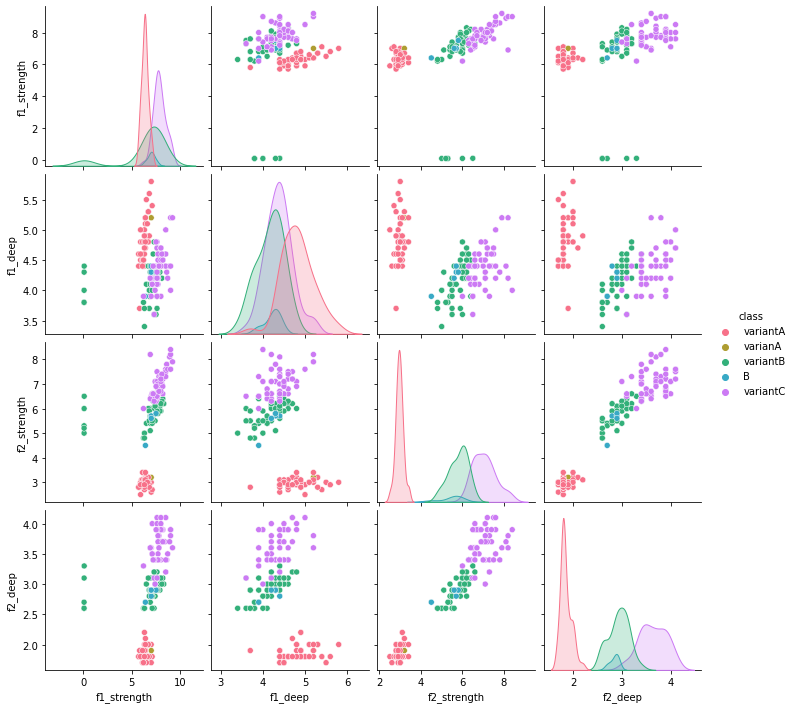

In [6]:
# Eliminamos temporalmente los valores nulos 'NA'
# porque la función Seaborn plotting function no sabe qué
# hacer con ellos
sb.pairplot(diagnosis_data.iloc[:, 0:5].dropna(), hue="class", palette="husl");

A partir de la matriz de gráficos, analicemos más problemas en el juego de datos:

1. Hay cinco clases, cuando solo debería haber tres: probablemente debido a algunos errores en los nombres de las clases.

2. Hay algunos valores extremos que aparentemente deben ser errores: una fila de `f1_deep` para `variantA` está claramente fuera del rango habitual y varias filas de `f1_strength` para `variantB` tienen valores cercanos a cero. Deberemos buscar una razón.

3. Hemos eliminado las filas con valores nulos para poder generar los gráficos.

En cada uno de estos tres casos deberemos tomar una decisión, lo que nos lleva al siguiente paso.

## Paso 3: acondicionado de datos

[[ inicio del documento ]](#Indice-de-contenidos)



Hasta ahora hemos identificado varios problemas a nivel de datos, de modo que deberemos resolverlos antes de seguir con el análisis.

>Tenemos cinco clases mientras que solo debería haber tres. Tenemos errores de escritura en el juego de datos.

Después de interactuar con el equipo de científicos, hemos visto que uno de ellos olvidó añadir la palabra `variant` en algunas de las filas correspondientes a `variantB`. La otra clase sobrante, `varianA`, simplemente era un error *typo* que olvidaron corregir.

Usaremos el objeto *DataFrame* para corregir estos errores.

In [7]:
diagnosis_data.loc[diagnosis_data['class'] == 'B', 'class'] = 'variantB'
diagnosis_data.loc[diagnosis_data['class'] == 'varianA', 'class'] = 'variantA'

diagnosis_data['class'].unique()

array(['variantA', 'variantB', 'variantC'], dtype=object)

Perfecto, ya tenemos solo tres clases. No nos podemos permitir el lujo de generar un modelo que trabaje con clases que no tienen sentido.

>Hay algunos valores extremos que aparentemente son errores: una fila de `f1_deep` perteneciente a `variantA` está claramente fuera del rango normal y varias filas de `f1_strength` pertenecientes a `variantB` tienen valores anormalmente bajos por algún motivo.

La gestión de valores extremos no es en absoluto una materia obvia en el mundo de la analítica de datos. Normalmente no es fácil discernir si se trata de un error numérico o si realmente responde a una anomalía en la que deberíamos profundizar. Por este motivo, deberemos ser muy cuidadosos cuando trabajemos con este tipo de valores. Si tomamos la decisión de excluirlos, deberemos documentar concretamente qué datos hemos excluido y, por supuesto, argumentarlo con razones sólidas.

En el caso concreto de las filas anómalas de `variantA`, nuestros compañeros científicos nos han explicado que es imposible para la enfermedad estudiada del tipo `variantA` tener una medida `f1_deep` por debajo de 3.9. Claramente este valor debe ser revisado.

''

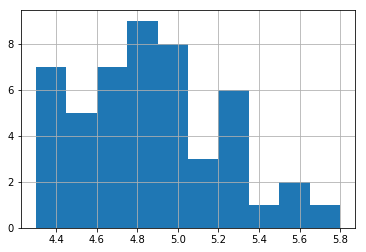

In [8]:
# Eliminamos filas 'variantA' con f1_deep por debajo de 3.9
diagnosis_data = diagnosis_data.loc[(diagnosis_data['class'] != 'variantA') | (diagnosis_data['f1_deep'] >= 3.9)]
diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f1_deep'].hist()
;

¡Muy bien! Observamos que todos los diagnósticos `variantA` están por encima de 3.9.

Nuestro siguiente objetivo será gestionar los valores cercanos a cero en la medida de `f1_strength` para el caso `variantB`. Empecemos por visualizar estas filas.

In [9]:
diagnosis_data.loc[(diagnosis_data['class'] == 'variantB') &
              (diagnosis_data['f1_strength'] < 1.0)]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
86,variantB,0.080,4.4,6.5,3.3,13.86,3.41,4.21,24.9,92.2,4.08,4.09,2.93,4.16,5.15,4.13,5.16,512.0
87,variantB,0.073,4.3,6.0,3.1,13.35,3.47,4.52,28.1,90.2,4.22,4.01,2.90,3.94,5.30,4.16,6.11,579.0
88,variantB,0.070,4.0,5.0,2.6,13.34,3.86,4.36,23.7,86.2,4.25,4.09,2.98,3.95,5.50,3.80,5.65,697.0
89,variantB,0.068,3.8,5.3,2.7,13.78,3.13,4.20,25.7,72.2,4.50,3.99,2.92,3.98,4.44,3.87,6.11,642.0
90,variantB,0.068,3.8,5.2,2.6,13.78,3.63,4.22,20.6,83.2,3.90,3.90,3.02,4.24,5.10,3.88,5.17,497.0


¿Qué puede haber sucedido? Todos estos valores de `f1_strength`, cercanos a cero, podría ser que se hubieran tomado en milímetros en lugar de centenas de milímetros. 

Efectivamente, el equipo de científicos nos confirma nuestras sospechas, de modo que por nuestra parte procedemos a realizar la conversión de unidad pertinente.

''

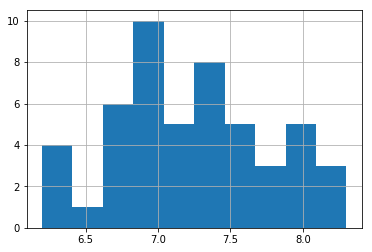

In [10]:
diagnosis_data.loc[(diagnosis_data['class'] == 'variantB') &
              (diagnosis_data['f1_strength'] < 1.0),
              'f1_strength'] *= 100.0

diagnosis_data.loc[diagnosis_data['class'] == 'variantB', 'f1_strength'].hist()
;

¡Perfecto! Ya no tenemos valores *outliers* que podían haber tenido un impacto muy negativo en nuestro estudio.

>Hemos tenido que prescindir de las filas con valores nulos para poder generar los gráficos.

Empecemos por visualizar las filas con valores nulos:

In [11]:
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,NaN,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,NaN,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,NaN,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,NaN,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,NaN,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0
109,variantB,NaN,NaN,NaN,NaN,13.31,3.15,4.60,22.1,96.2,5.04,5.32,2.79,5.09,5.35,3.76,6.16,697.0
110,variantB,NaN,NaN,NaN,NaN,13.16,5.54,3.72,21.6,109.2,5.48,4.98,2.74,6.18,5.60,3.55,5.71,579.0
111,variantB,NaN,NaN,NaN,NaN,14.22,4.23,4.07,23.1,90.2,4.85,4.67,2.76,3.82,4.70,3.70,5.68,342.0
112,variantB,NaN,NaN,NaN,NaN,13.46,4.48,4.82,22.1,105.2,4.05,4.43,3.10,3.65,6.50,4.03,5.40,624.0
113,variantB,NaN,NaN,NaN,NaN,13.11,2.54,4.40,23.1,90.2,4.78,4.41,2.92,4.04,5.78,3.90,5.21,451.0


Observamos como para los casos de `variantB` las primeras cuatro características tienen todas valores nulos, de modo que optamos por eliminar estas entradas ya que nuestro estudio se centra precisamente en estas cuatro columnas y se trata de demasiadas filas. Con tantas filas, rellenar con medias generaría un sesgo hacia la media que no creemos bueno para generalizar.

In [12]:
diagnosis_data.dropna(subset=['f1_strength','f1_deep','f2_strength'], inplace = True)
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,NaN,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,NaN,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,NaN,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,NaN,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,NaN,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0


Nos queda todavía un resto de valores nulos en la característica `f2_deep` de los casos `variantA`.
Eliminando todas estas filas estamos pagando un precio alto puesto que todas ellas pertenecen a la clase `variantA` y solo tenemos el problema en una característica. El problema que nos encontramos es que nuestro juego de datos queda **sesgado** ya que todos los problemas de valores nulos se concentran bajo la misma tipología de enfermedad. En consecuencia, tendremos menos información sobre esta clase y este hecho nos podría llevar a construir un modelo incorrecto.

Bajo estas circunstancias, una buena opción sería rellenar los valores nulos con la media de esta característica dentro de su clase: si sabemos que los valores de esta medida deberían estar dentro de un cierto rango, entonces tiene sentido rellenarlos con valores como la media.

Veamos cómo podemos hacerlo.

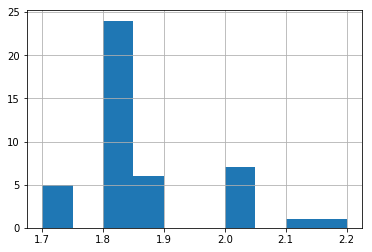

In [13]:
diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f2_deep'].hist();

La mayoría de valores `f2_deep` para `variantA` se mantienen en el rango 1.8-1.9, de modo que optaremos por informar a los valores nulos con el valor de la media.

In [14]:
average_f2_deep = diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f2_deep'].mean()

diagnosis_data.loc[(diagnosis_data['class'] == 'variantA') &
              (diagnosis_data['f2_deep'].isnull()),
              'f2_deep'] = average_f2_deep

diagnosis_data.loc[(diagnosis_data['class'] == 'variantA') &
              (diagnosis_data['f2_deep'] == average_f2_deep)]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,1.85,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,1.85,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,1.85,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,1.85,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,1.85,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0


In [15]:
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter


¡Perfecto! Ya no tenemos valores nulos en nuestro juego de datos.

**Nota:** el juego de datos contiene más valores nulos en otras características. Para simplificar, solo nos estamos centrando en las cuatro primeras.

Llegados a este punto y para no repetir todos estos pasos, optaremos por guardar el juego de datos ya limpio. 

In [16]:
diagnosis_data.to_csv('diagnosis-data-clean.csv', index=False)

diagnosis_data_new = pd.read_csv('diagnosis-data-clean.csv')
diagnosis_data_clean = diagnosis_data_new.iloc[:,0:5]

Tras el acondicionado de datos, merece la pena generar una matriz de gráficos para echar un vistazo general a los datos y certificar que las correcciones que hemos aplicado hasta el momento funcionan.

/home/jgi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


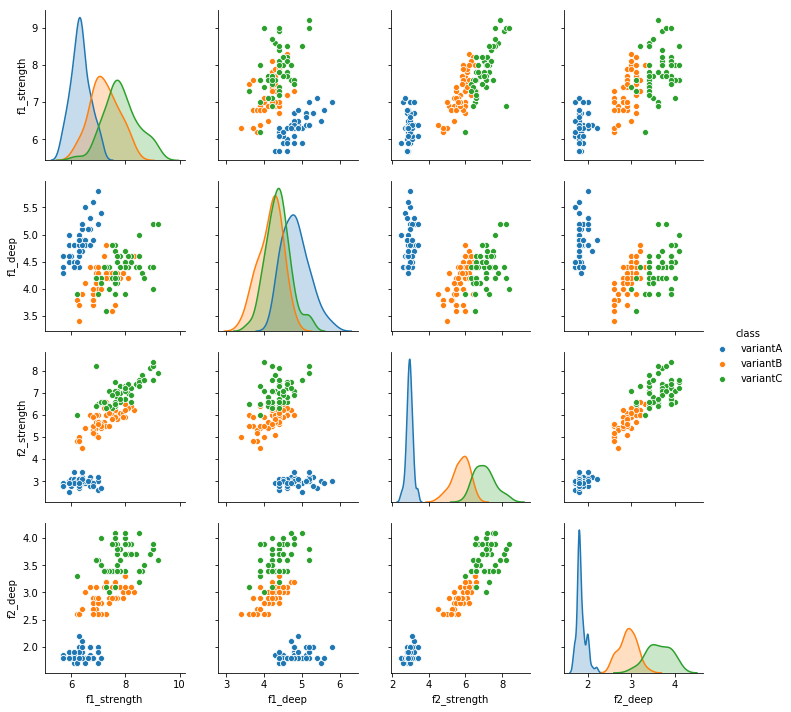

In [17]:
sb.pairplot(diagnosis_data_clean, hue='class');

Las pequeñas modificaciones que hemos hecho sobre el juego de datos original nos han servido para mostrar algunos de los aspectos que tener en cuenta y valorar las opciones que tenemos para gestionarlos.

Las buenas prácticas que tener en cuenta deberían ser las siguientes:

* Asegurarse de que los datos se han registrado correctamente.

* Asegurarse de que los datos están dentro de rangos de valores aceptables y usar el conocimiento de expertos en la materia para valorar si los valores son o no normales.

* Gestionar los valores nulos, ya sea informando valores nuevos o eliminando las filas afectadas.

* Nunca acondicionar los datos manualmente porque puede inducir a nuevos errores y no es una práctica reproducible.

* Usar código como una forma de dejar constancia de las acciones de acondicionado de datos que se han llevado a cabo.

* Generar gráficos en este punto del estudio analítico para verificar de un modo visual que el juego de datos tiene un buen aspecto.

## Verificaciones adicionales

[[ inicio del documento ]](#Indice-de-contenidos)

Una buena práctica aconsejable principalmente para verificar que el acondicionado de datos cumple con una serie de requisitos prestablecidos es la de realizar verificaciones mediante código.

De este modo, podremos asegurar de una forma rápida y automatizada un nivel de calidad mínimo en nuestro juego de datos. La instrucción de Python que tener en cuenta es `assert`. Con este comando aseguramos que una afirmación determinada se cumple. Si realmente la afirmación se cumple, entonces el *notebook* sigue adelante y no sucede nada; sin embargo, si la afirmación no se cumple, entonces el *notebook* se para y lanza un mensaje de error advirtiendo del problema. Por ejemplo,

```Python
assert 1 == 2
```

Generará un mensaje `AssertionError` y paralizará la ejecución del *notebook* porque la afirmación no se cumple.

Veamos cómo podemos utilizar en nuestro caso esta funcionalidad de Python.

In [18]:
# Sabemos que solo deberíamos tener tres clases correspondientes a las variantes de la enfermedad estudiada
assert len(diagnosis_data_clean['class'].unique()) == 3

In [19]:
# También sabemos que la f1_strength para la clase 'variantB' nunca debería estar por debajo de 3.9
assert diagnosis_data_clean.loc[diagnosis_data_clean['class'] == 'variantB', 'f1_strength'].min() >= 3.9

In [20]:
# Sabemos que nuestro juego de datos no debería tener valores nulos
assert len(diagnosis_data_clean.loc[(diagnosis_data_clean['f1_strength'].isnull()) |
                               (diagnosis_data_clean['f1_deep'].isnull()) |
                               (diagnosis_data_clean['f2_strength'].isnull()) |
                               (diagnosis_data_clean['f2_deep'].isnull())]) == 0

Y así podríamos continuar con más verificaciones. Si alguna de estas asunciones falla, el *notebook* se parará y nos enviará un mensaje de error para que gestionemos el problema.

## Paso 4: análisis exploratorio

[[ inicio del documento ]](#Indice-de-contenidos)



En la fase de análisis exploratorio es en la que empezamos a profundizar más en los datos. En este estadio ya no tenemos valores extremos ni valores nulos ni errores en los datos. De modo que podemos empezar a plantear preguntas del siguiente estilo:

* ¿Qué tipo de distribuciones tengo en mi juego de datos?

* ¿Existen correlaciones entre características?

* ¿Hay factores concretos que puedan explicar estas correlaciones?

Esta es la fase en la que explotamos más a fondo las capacidades de visualización que tengamos al alcance. Vamos a generar muchos gráficos que no necesariamente van a ser bonitos, no debemos preocuparnos de eso en esta fase ya que van a ser de uso interno.

Volvamos a usar la matriz de gráficos que ya conocemos de pasos anteriores.

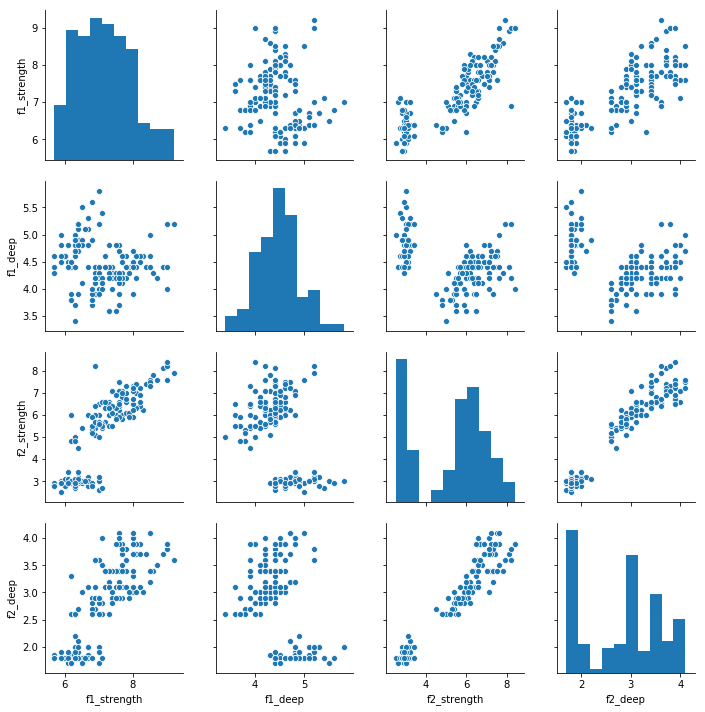

In [21]:
sb.pairplot(diagnosis_data_clean);

Observamos que las características _f1_ (`f1_strengt`, `f1_deep`) están normalmente distribuidas, hecho que nos beneficia si vamos a utilizar modelos que presuponen una distribución normal de datos.

Sin embargo, observamos algo extraño en las características _f2_. Quizá haya particularidades entre las diferentes variantes de la enfermedad. Asignemos colores distintos a cada clase para entender mejor lo que puede estar ocurriendo.

/home/jgi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


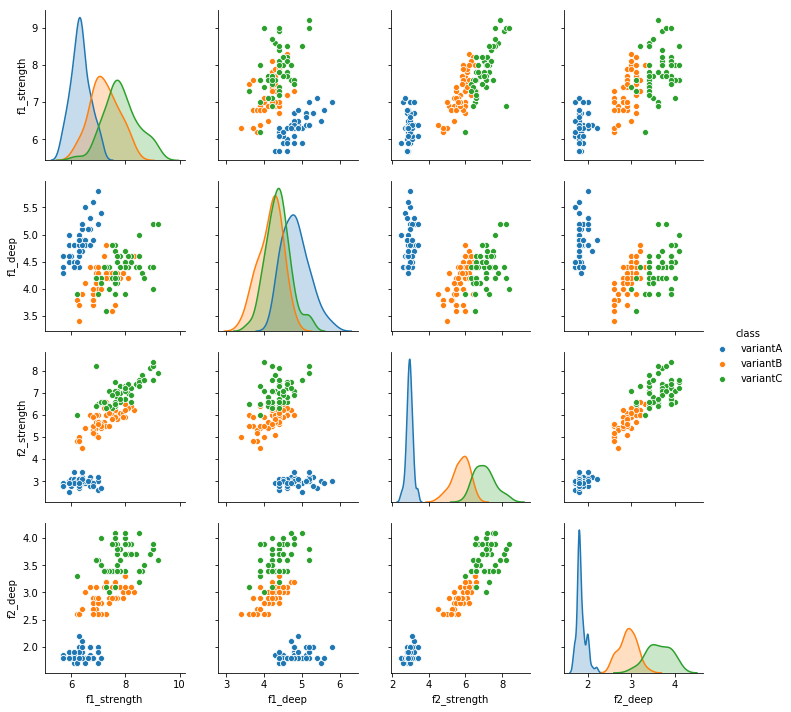

In [22]:
sb.pairplot(diagnosis_data_clean, hue='class');

Ahora vemos claro que la distribución extraña que veíamos antes se debe a la mezcla de las distintas clases. Buenas noticias, puesto que apreciamos que, efectivamente, dentro de cada variante se entrevé una distribución cercana a la normal. Adicionalmente, este comportamiento distinto de cada variante va a facilitar el trabajo de clasificación ya que las distribuciones  de `variantA` con respecto al resto de variantes son claramente distintas.

Por otro lado, también anticipamos posibles dificultades en el proceso de clasificación entre `variantB` y `variantC` ya que las distribuciones de sus características se solapan.

También apreciamos correlaciones entre las medidas _f2_, así como también entre las medidas _f1_. Los científicos nos aseguran que este hecho era de esperar y que está completamente dentro de la normalidad.

Usaremos gráficos de violín,  **violin plots** en inglés, para comparar las distribuciones de las características entre distintas variantes. Los gráficos de violín contienen la misma información que los [box plots](https://en.wikipedia.org/wiki/Box_plot), pero con el añadido de aportar información sobre las zonas de densidad de datos.

In [23]:
diagnosis_data_clean.columns

Index(['class', 'f1_strength', 'f1_deep', 'f2_strength', 'f2_deep'], dtype='object')

/home/jgi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


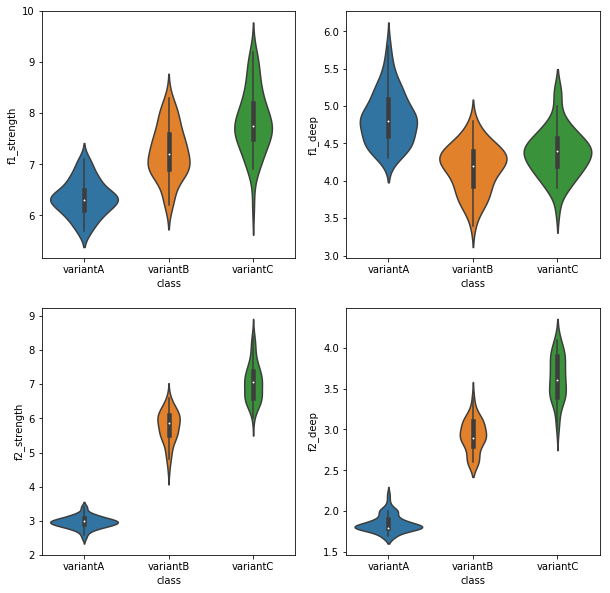

In [24]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(diagnosis_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 0)
    sb.violinplot(x='class', y=column, data=diagnosis_data_clean)

Estamos ya en disposición de iniciar la fase de modelado, la más atractiva para la mayoría del público.

## Paso 5: clasificación

[[ inicio del documento ]](#Indice-de-contenidos)

Merece la pena observar que en este punto llevamos mucho trabajo hecho con los datos y todavía no hemos generado ni un solo modelo.

Las tareas anteriores pueden parecer aburridas y tediosas, pero sin las tareas de acondicionado, verificación y exploración, generaríamos ahora modelos de clasificación sin a penas capacidad de generalización.

Apuntad la siguiente máxima: «**bad data leads to bad models**». Verificad siempre vuestros datos antes de nada.

<hr />

Lo primero que vamos a necesitar para alimentar a nuestro generador de modelos de clasificación es proporcionarle dos juegos de datos: el de entrenamiento y el de pruebas.

Un **_training set_** es un subconjunto aleatorio del juego de datos que vamos a usar para entrenar nuestros modelos.

Un **_testing set_** es un subconjunto aleatorio del juego de datos (mutuamente excluyente del *training set*) que vamos a usar para validar la capacidad predictiva de los modelos generados. 

Especialmente en juegos de datos dispersos como el nuestro, es fácil que los modelos caigan en el sobrentrenamiento u **_overfit_**; es decir, el modelo se adapta en exceso a los datos que conoce y, en consecuencia, es incapaz de generalizar sobre datos que no ha visto nunca. Por este motivo es importante generar el modelo con un juego de datos y validarlo con otro totalmente distinto.

Es importante notar que una vez hayamos separado en dos nuestro juego de datos (*training set* + *testints set*), deberíamos tratar el *testing set* como si jamás hubiera existido, es decir, no debe participar para nada en el proceso de entrenamiento del modelo, de lo contrario nos estaremos haciendo trampas a nosotros mismos.

Empecemos por separar el juego de datos.


In [25]:
diagnosis_data_clean = pd.read_csv('diagnosis-data-clean.csv')

# Usaremos todas las características de medida como datos de entrada
# Notar que scikit-learn espera como datos de entrada una lista de valores, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# de modo que nuestro juego de datos de entrada serà en realidad una lista de listas

# Podemos usar *pandas* para generar nuestra lista de datos:
all_inputs = diagnosis_data_clean[['f1_strength', 'f1_deep',
                             'f2_strength', 'f2_deep']].values

# Del mismo modo, podemos obtener una lista de clases
all_labels = diagnosis_data_clean['class'].values

# Deberemos tener cuidado de no mezclar los índices de las dos listas de valores
# los valores de all_inputs[5] deberían corresponder a la clase en all_labels[5]

# Este es el aspecto que tiene nuestra lista de valores:
all_inputs[:5]

array([[6.4, 4.9, 2.9, 1.8],
       [6.2, 4.4, 2.9, 1.8],
       [6. , 4.6, 2.8, 1.8],
       [5.9, 4.5, 3. , 1.8],
       [6.3, 5. , 2.9, 1.8]])

Ahora nuestros datos están listos para ser separados en dos:

In [26]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

Una vez tenemos nuestro juego de datos separado en *training set* y *testing set* y atendiendo a las directrices de nuestro responsable de datos, vamos a proceder a generar un modelo de clasificación.

Una de las mejores opciones que tenemos es la de empezar por los árboles de decisión. Estos tienen una propiedad interesante: son **escalar-invariantes**, es decir, la escala en la que están representadas las características del juego de datos no afecta en absoluto su rendimiento, contrariamente a otros modelos de minería de datos, que sí requieren que los datos estén previamente normalizados. En otras palabras, no importa si nuestras características toman valores entre 0 y 1 o los toman entre 0 y 1.000; los árboles de decisión funcionarán igualmente en ambos casos.

Hay algunos [parámetros](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) con los que podemos jugar para tratar de mejorar el rendimiento de los árboles de decisión. De todos modos, utilicemos, por ahora, los valores por defecto.

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

¡Muy bien! Inicialmente nuestro modelo obtiene una precisión 97 % en el proceso de clasificación.

Sin embargo, hay una trampa: dependiendo de cómo se han distribuido los datos entre el *training set* y el *testing set*, nuestro modelo puede llegar a tener niveles de predicción del 80 % al 100 %.

Para ver este efecto, vamos a repetir 1.000 veces la tarea de generación aleatoria de juegos de datos *training set* y *testing set* y generación de árbol de decisión.

''

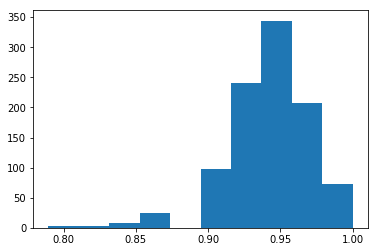

In [28]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

Obviamente, nos encontramos ante un problema. No es bueno que en función de la distribución de datos que hagamos tengamos tanta diferencia en la capacidad predictiva de nuestro modelo de clasificación. Este fenómeno recibe el nombre de _sobrentrenamiento_ u **_overfitting_**. El modelo aprende a clasificar el *training set* tan bien que después es incapaz de generalizar en nuevos datos lo aprendido.

### _Cross-validation_

[[ inicio del documento ]](#Indice-de-contenidos)

El problema del sobrentrenamiento es la principal razón por la que muchos analistas optan por la funcionalidad del **_k-fold cross-validation_** en sus modelos: separar el juego de datos original en _k_ subconjuntos para emplear uno de ellos como *testing set* y el resto de subconjuntos como *training set*. Este proceso se repite _k_ veces de modo que cada subconjunto se usa como *testing set* exactamente una vez.

_k_ = 10 es la fórmula más utilizada, de modo que vamos a probarla:

(Cada cuadrado es una entrada en nuestro juego de datos.)

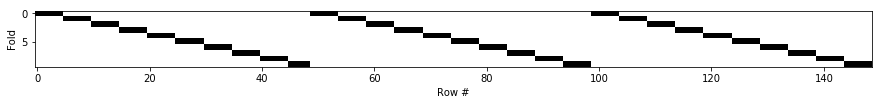

In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Observad que en el código anterior hemos utilizado la variante **_stratified *k*-fold cross-validation_**. Esta técnica nos ofrece la ventaja de mantener las proporciones entre los _k_ subconjuntos de datos que va generando, hecho que nos aporta ventajas a la hora de mantener la representatividad de cada subconjunto (p. ej., no vamos a tener 100 % de clases `variantA` en uno de los subconjuntos).

Apliquemos ahora _10-fold cross-validation_ sobre nuestro modelo con el siguiente código:

''

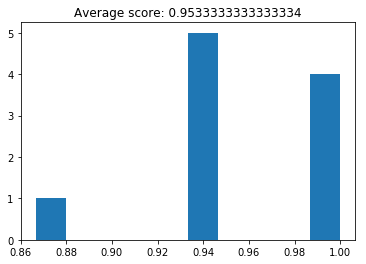

In [30]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score devuelve una lista de scores, que podemos visualizar
# para obtener una estimación razonable del rendimiento de nuestro clasificador
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Ahora tenemos unas puntuaciones de predicción más consistentes de nuestro clasificador.

### _Parameter tuning_

[[ inicio del documento ]](#Indice-de-contenidos)

Cada modelo de minería de datos tiene asociados una serie de parámetros sobre los que podemos hacer ajustes con la intención de mejorar el modelo. Por ejemplo, si reducimos significativamente el parámetro `max_depth` de nuestro árbol de decisión:

''

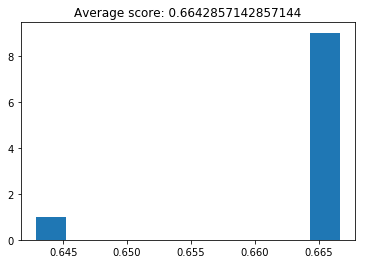

In [31]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

La precisión del modelo decae significativamente.

En consecuencia, necesitamos disponer de un proceso que nos permita escoger la combinación óptima de parámetros para alcanzar los niveles más altos posibles de rendimiento en nuestros modelos.

Uno de los métodos más habituales para *parameter tuning* de modelos es **Grid Search**. La idea tras este modelo es simple: probar sobre un rango de parámetros hasta encontrar los valores que ofrecen un mejor rendimiento del modelo. Debemos centrar nuestra intuición como analistas en escoger el mejor rango posible para que sea el método **Grid Search** quien se encargue de determinar los valores óptimos dentro del rango que nosotros le hemos fijado. Se trata de un proceso iterativo de adecuación de rangos y búsqueda de valores óptimos.

Pongamos en práctica un proceso de *tuning* sobre nuestro árbol de decisión. Trabajaremos solo con dos parámetros para empezar (`max_depth` y `max_features`), pero podríamos llegar a trabajar con muchos más.

In [32]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'max_depth': 3, 'max_features': 4}


/home/jgi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Visualicemos el resultado en un gráfico para entender mejor las combinaciones posibles:

''

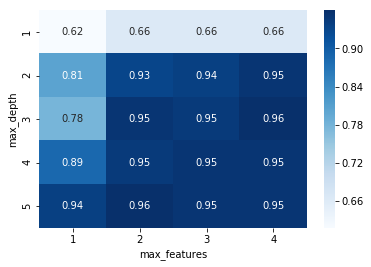

In [33]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Con este gráfico disponemos de una visión global del espacio de parámetros. Con esto sabemos que necesitamos un valor `max_depth` de como mínimo dos para disponer de un árbol de decisión con precisión aceptable.

Sin embargo, el parámetro `max_features` parece no ser demasiado significativo siempre y cuando mantengamos dos características, hecho que tiene sentido ya que nuestro juego de datos tiene solo cuatro (recordemos que una de nuestras clases era fácilmente separable usando tan solo una característica).

Sigamos adelante y usemos más parámetros en el proceso de *tunning*.

In [34]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'splitter': 'best'}


/home/jgi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ahora ya podemos seleccionar el mejor modelo de los que tenemos en Grid Search:

In [35]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Podemos visualizar nuestro árbol de decisión usando la herramienta [GraphViz](http://www.graphviz.org/) para poder apreciar qué lógica sigue para tomar sus decisiones:

In [36]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('diagnosis_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

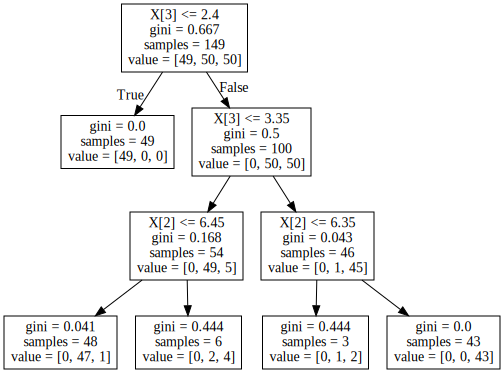

In [37]:
# Visualización del gráfico generado y guardado en el fichero diagnosis_dtc.dot
import graphviz
from IPython.display import display

with open("diagnosis_dtc.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


Acabamos de generar un árbol de decisión a partir de las cuatro primeras características de nuestro juego de datos:

_X_[0] = `f1_strengt`  
_X_[1] = `f1_deep`  
_X_[2] = `f2_strengt`  
_X_[3] = `f2_deep`  

Observamos como en el primer nodo se plantea la primera pregunta:  
Filas con `f2_deep` por debajo de 2.337.
La respuesta positiva toma `value = [49,0,0]`, indicando que tenemos 49 casos de `variantA`.
La respuesta negativa toma `value = [0,50,50]`, indicando que tenemos 50 casos de `variantB` y 50 casos más de `variantC`.

Una vez generada una primera versión de nuestro modelo, crearemos algunos gráficos con el objetivo de que nos ayuden a visualizar su rendimiento para así poder presentarlo al responsable de datos de New Diagnosis LLC.


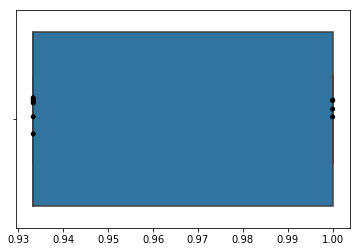

In [38]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black');

Vaya... como gráfico no parece demasiado espectacular. Quizá si generamos otro clasificador y los comparamos será más fácilmente explicable.

Sabemos por experiencia que el algoritmo Random Forest suele dar mejores resultados que otros árboles de decisión individuales. Un problema endémico de los árboles de decisión es que son propensos a sobrentrenar: incrementan la complejidad hasta llegar a clasificar casi perfectamente el *training set*, pero cuando se trata de generalizar sobre datos que no han visto antes, fallan.

**Random Forest** puede superar esta limitación creando un grupo de árboles de decisión, *forest*, cada uno entrenado con subconjuntos de datos aleatorios (construidos con reposición de valores) y características (también con reposición) —y poniendo a trabajar todos los árboles juntos hasta alcanzar la mejor decisión en cada caso—.

Veamos si Random Forest funciona realmente mejor:

Una de las ventajas de trabajar con *scikit-learn* es que las partes de _training_, _testing_, _parameter tuning_, etc. pueden ser reaprovechadas para todos los modelos, de modo que solo necesitamos pasarlos tal cual a las funciones que vayamos usando.

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9731543624161074
Best parameters: {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 10}


/home/jgi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

''

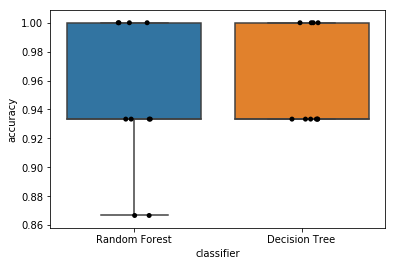

In [40]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

Ahora tiene mejor aspecto. Ambos modelos muestran un buen rendimiento en este juego de datos. Quizá esto se deba a nuestra voluntad de mantener la sencillez del estudio. Este compromiso nos ha mantenido trabajando tan solo con **cuatro de las diecisiete características disponibles**. *Random Forest*, sin embargo, es especialmente bueno cuando trabaja con centenares de características. En otras palabras, tampoco había tanto espacio para la mejora.

## Paso 6: reproducibilidad

[[ inicio del documento ]](#Indice-de-contenidos)

Asegurarse de que el trabajo que hemos hecho es reproducible es el último y, probablemente, más importante paso en cualquier análisis. **Como norma general, no deberíamos dar demasiada importancia a un descubrimiento que no podamos reproducir**. Como tal, si nuestro análisis no es reproducible, es como si no lo hubiéramos hecho.

Un *notebook* como este, se ha hecho deliberadamente extenso para hacer que nuestro estudio sea reproducible. Hemos documentado paso a paso todo lo que íbamos haciendo, disponemos de un registro escrito de texto y código de lo que hicimos y de porqué lo hicimos. Todo esto otorga **credibilidad** al propio estudio ya que lo convierte en verificable y, por supuesto, en mejorable en tanto en cuanto puede suponer a su vez **punto de partida para nuevas iniciativas**.

Más allá de registrar lo que hicimos, también deberíamos documentar qué software y hardware hemos usado para generar nuestro análisis. Estos datos suelen mostrarse al inicio del estudio para que nuestros lectores sepan qué herramientas van a necesitar.


In [41]:
import sys
print('Python       :', sys.version)
import platform
print('Platform     :', platform.platform())
print('version      :', platform.version())
print('node         :', platform.node())

Python       : 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
Platform     : Linux-4.15.0-45-generic-x86_64-with-debian-buster-sid
version      : #48-Ubuntu SMP Tue Jan 29 16:28:13 UTC 2019
node         : jgi-NUC7i5BNH


Para terminar, reproduciremos de un solo golpe los pasos esenciales de nuestro estudio.

[7.6 3.9 6.4 3.1]	-->	variantB	(Actual: variantB)
[7.6 4.2 6.6 3.1]	-->	variantB	(Actual: variantC)
[6.4 5.2 3.  1.9]	-->	variantA	(Actual: variantA)
[8.2 4.6 7.2 3.9]	-->	variantC	(Actual: variantC)
[6.7 4.8 3.  2. ]	-->	variantA	(Actual: variantA)
[8.5 5.  7.6 4.1]	-->	variantC	(Actual: variantC)
[7.8 4.6 6.6 3.6]	-->	variantC	(Actual: variantC)
[6.9 4.3 5.1 2.9]	-->	variantB	(Actual: variantB)
[7.4 4.  7.1 3. ]	-->	variantB	(Actual: variantC)
[7.1 5.4 2.7 1.8]	-->	variantA	(Actual: variantA)


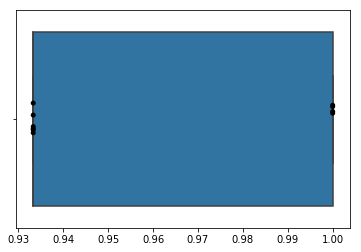

In [42]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Nos ahorramos toda la parte de preprocesado de datos y partimos directamente del juego de datos limpio.
diagnosis_data_clean = pd.read_csv('diagnosis-data-clean.csv')

# Para mayor seguridad, verificamos nuestro juego de datos. Si alguna de nuestras suposiciones no es correcta,
# entonces el código no seguirá adelante en su ejecución.

# Sabemos que solo deberíamos tener 3 clases
assert len(diagnosis_data_clean['class'].unique()) == 3

# Sabemos que f1_strength para 'variantB' no debería estar por debajo de 3.9
assert diagnosis_data_clean.loc[diagnosis_data_clean['class'] == 'variantB', 'f1_strength'].min() >= 3.9

# Sabemos que nuestro juego de datos no debería contener valores nulos
assert len(diagnosis_data_clean.loc[(diagnosis_data_clean['f1_strength'].isnull()) |
                               (diagnosis_data_clean['f1_deep'].isnull()) |
                               (diagnosis_data_clean['f2_strength'].isnull()) |
                               (diagnosis_data_clean['f2_deep'].isnull())]) == 0

all_inputs = diagnosis_data_clean[['f1_strength', 'f1_deep',
                             'f2_strength', 'f2_deep']].values

all_labels = diagnosis_data_clean['class'].values

# Guardamos el clasificador obtenido a partir de Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

# Solo nos queda visualizar las puntuaciones obtenidas en el proceso de cross-validation
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...y por supuesto, mostrar algunas de las predicciones obtenidas a partir del modelo clasificador
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

Y aquí lo tenemos: hemos construido un proceso de minería de datos completamente reproducible que servirá de versión demo para el responsable de datos de New Diagnosis LLC. Además, hemos logrado el objetivo analítico que habíamos fijado al inicio del estudio (> 90 % predicción) y nuestro código es suficientemente flexible como para aceptar nuevas variantes de la enfermedad estudiada con nuevos datos. ¡No está nada mal!

## Conclusiones

[[ inicio del documento ]](#Indice-de-contenidos)

Este caso de estudio forma parte del material didáctico de la asignatgura de Minería de datos de los Estudios de Informática de la UOC.

Se ha seleccionado este formato por la sencillez del juego de datos, por el buen encaje en una idea de negocio y, sobre todo, por el **desarrollo meticuloso y riguroso del proceso analítico** en el que cada paso está inspirado en un **decálogo de buenas prácticas** que podrán servir al estudiante para crecer en este ámbito de conocimiento.

Además, el juego de datos ofrece posibilidades más allá de las exploradas en este *notebook*, puesto que tan solo se han usado cuatro de las diecisiete características descriptivas disponibles.



## Agradecimientos

[[ inicio del documento ]](#Indice-de-contenidos)

Queremos agradecer, en primer lugar, la inspiración del trabajo de  [Randal S. Olson](http://www.randalolson.com/) en su [notebook repository](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/).

También damos las gracias a [Andreas Mueller](http://amueller.github.io/) por algunos de sus [ejemplos](https://github.com/amueller/scipy_2015_sklearn_tutorial) del apartado sobre *machine learning*. 

Finalmente, agradecemos a Stock Free Images la cesión de la imagen del laboratorio: © Senk | <a href="https://www.stockfreeimages.com/">Stock Free Images</a>